In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.shape

(7176, 4)

5. gdp_fg has 7176 rows and 4 columns

In [3]:
gdp_df.columns.values

array(['Country or Area', 'Year', 'Value', 'Value Footnotes'],
      dtype=object)

In [4]:
gdp_df_drop = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df_drop

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [5]:
gdp_df_rename = gdp_df_drop.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df_rename

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [55]:
gdp_df_rename.Country.value_counts()

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

In [7]:
gdp_df_rename.Year.value_counts().head()

2018    242
2017    242
2016    242
2015    242
2014    242
Name: Year, dtype: int64

In [8]:
gdp_df_rename.GDP_Per_Capita.value_counts().head()

3874.452186    2
4329.769304    2
2902.528671    2
5970.766272    2
6369.648115    2
Name: GDP_Per_Capita, dtype: int64

5. the columns are all int64

In [9]:
gdp_df_rename['Year'].shape

(7176,)

In [10]:
gdp_df_rename.Year.value_counts()

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

7. 205 countries have data for every year.

In [11]:
gdp_df_rename.Country.value_counts().tail()

Kosovo                       13
Turks and Caicos Islands     10
Sint Maarten (Dutch part)    10
Somalia                       8
Djibouti                      8
Name: Country, dtype: int64

7. Somalia and Djibouti only have 8 years of data.

In [12]:
gdp_df_2020 = gdp_df_rename.query('Year > 2019')
gdp_df_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


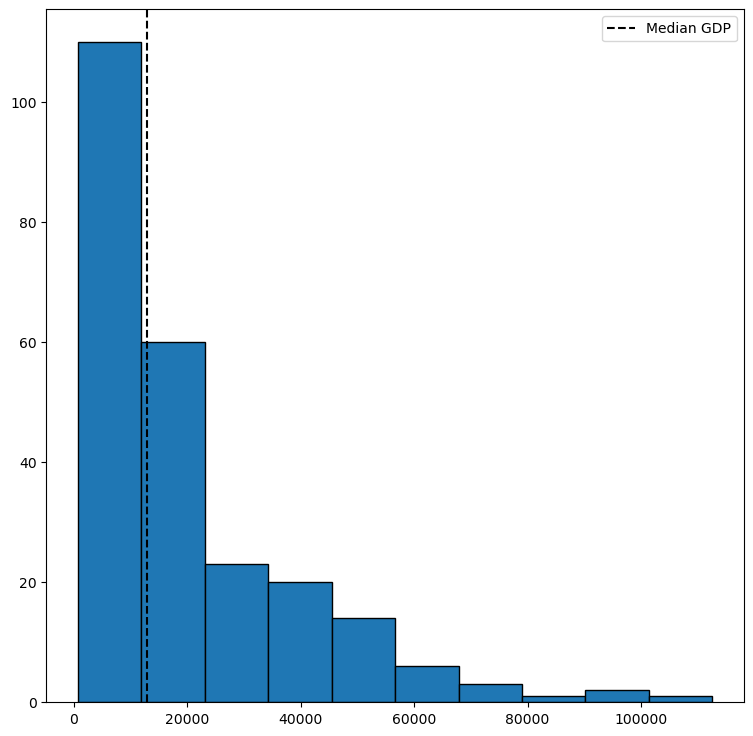

In [13]:
median_gdp = gdp_df_2020['GDP_Per_Capita'].median()
fig, ax =plt.subplots(figsize = (9, 9))
ax.hist(gdp_df_2020['GDP_Per_Capita'], bins = 10, edgecolor = 'black')
ax.axvline(median_gdp, color="black", ls="--", label="Median GDP")
ax.legend();

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

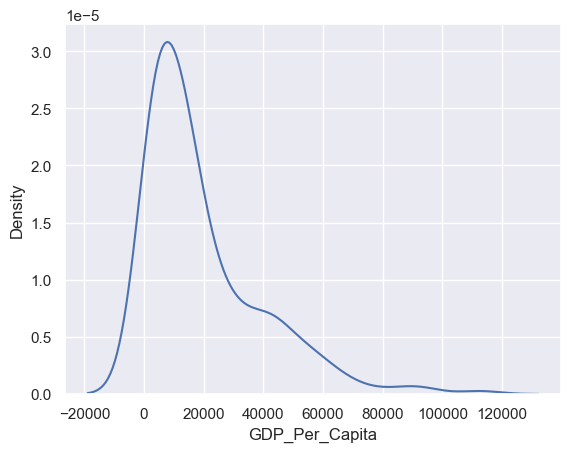

In [14]:
sns.set(style="darkgrid")
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'])

<AxesSubplot:ylabel='GDP_Per_Capita'>

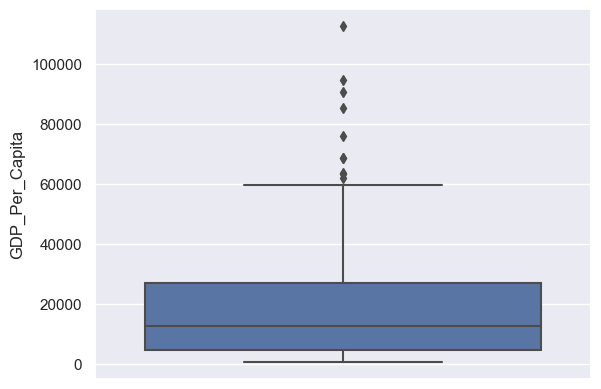

In [15]:
sns.boxplot(y = gdp_df_2020['GDP_Per_Capita'])

<AxesSubplot:ylabel='GDP_Per_Capita'>

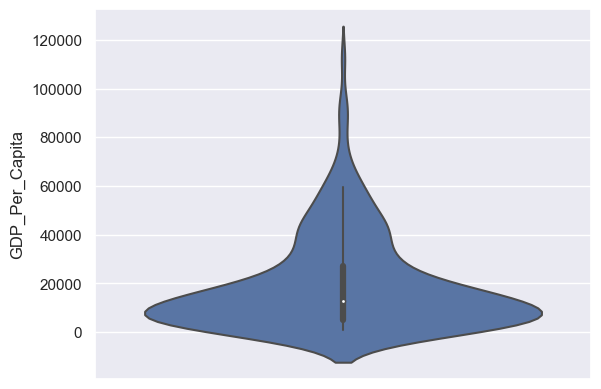

In [16]:
sns.violinplot(y = gdp_df_2020['GDP_Per_Capita'])

8. Boxplot and Violinplot both show a median value where you would have to add a reference line in Density or Histogram plot.

In [17]:
gdp_df_2020['GDP_Per_Capita'].median()

12908.9374056206

9. The median GDP_Per_Capita in 2020 was 12,909.

In [18]:
decade_list = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df_rename.query('Year in @decade_list')
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

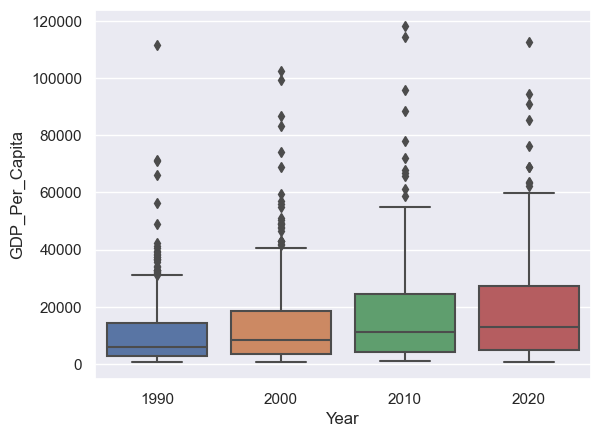

In [19]:
sns.boxplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])

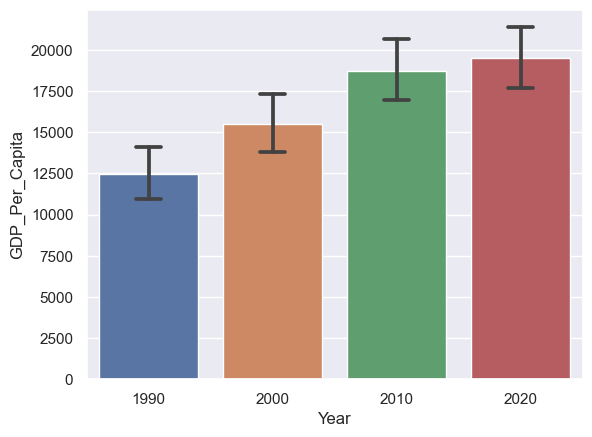

In [20]:
ax = sns.barplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_decades, estimator = np.mean, ci = 85, capsize = .2)

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

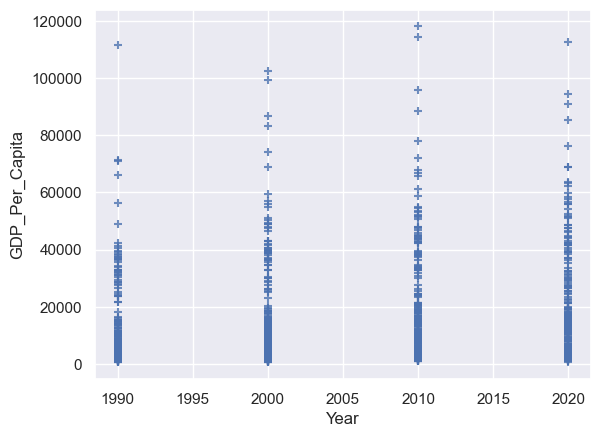

In [21]:
sns.regplot(y = gdp_decades['GDP_Per_Capita'], x = gdp_decades['Year'], marker = '+', fit_reg = False)

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

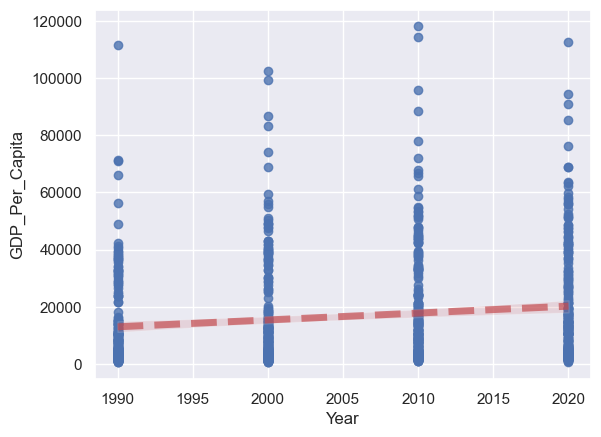

In [22]:
sns.regplot(y = gdp_decades['GDP_Per_Capita'], x = gdp_decades['Year'],
            line_kws = {'color':'r', 'alpha':0.7, 'lw':5, 'linestyle':'--'})

10. Boxplot and Barplot are similar in that they both show a median and certainty bars around that median. The advantage the 
    Boxplot has over Barplot is that the outliers are shown clearly. 
    
    Scatterplots show all datapoints and it may become confusing to draw a conclusion from the figure if there are too many 
    datapoints. The trendline helps with this since a clear trend is depicted.

In [23]:
gdp_df_byyear = gdp_df_rename.sort_values(by = 'Year')
gdp_df_byyear

,Country,Year,GDP_Per_Capita
7175,Zimbabwe,1990,2652.129209
5688,Seychelles,1990,14884.887776
4279,Micronesia,1990,2995.141814
1065,Cameroon,1990,3379.825673
3688,Lebanon,1990,7507.587177
...,...,...,...
2395,Greece,2020,27072.618645
3851,Lower middle income,2020,6998.011216
821,Brunei,2020,62200.882043
6065,St. Lucia,2020,12048.927741


In [24]:
gdp_df_byyear_100k = gdp_df_byyear.query('GDP_Per_Capita > 99999')
gdp_df_byyear_100k.head()

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665
6837,United Arab Emirates,1991,106103.552655
6836,United Arab Emirates,1992,103470.924576
6834,United Arab Emirates,1994,100213.156226
6833,United Arab Emirates,1995,101570.992100


11. The UAE was the first to hit 100,000 GDP per capita in 1990 with a GDP per capita of 111,454.

In [25]:
gdp_df_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057
...,...,...,...
4750,Niger,2020,1221.269930
5871,Somalia,2020,1180.965971
1524,Dem. Rep. Congo,2020,1082.445242
1136,Central African Republic,2020,937.856470


12. Luxembourg had the highest GDP per capita in 2020 of 112,557.

In [26]:
gdp_luxembourg = gdp_df_rename.loc[gdp_df_rename['Country'] == 'Luxembourg']
gdp_luxembourg.head()

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681


<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

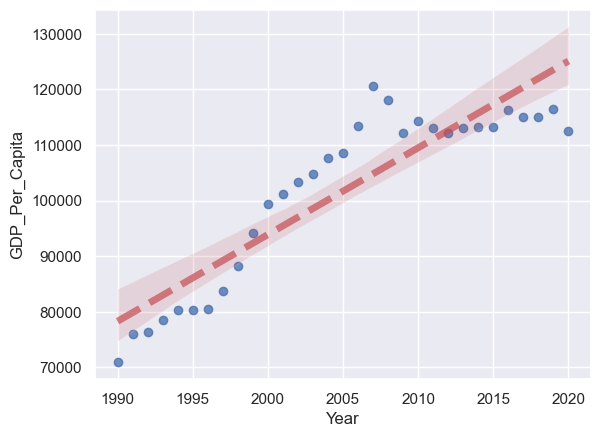

In [27]:
sns.regplot(y = gdp_luxembourg['GDP_Per_Capita'], x = gdp_luxembourg['Year'],
            line_kws = {'color':'r', 'alpha':0.7, 'lw':5, 'linestyle':'--'})

In [28]:
gdp_df_2020.sort_values(by = 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470
1524,Dem. Rep. Congo,2020,1082.445242
5871,Somalia,2020,1180.965971
4750,Niger,2020,1221.269930
...,...,...,...
639,Bermuda,2020,76105.138057
5381,Qatar,2020,85290.450430
3071,Ireland,2020,90789.221024
5720,Singapore,2020,94505.636160


13. Burundi had the lowest GDP per capita in 2020 of 731. 

In [29]:
gdp_burundi = gdp_df_rename.loc[gdp_df_rename['Country'] == 'Burundi']
gdp_burundi.head()

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340


<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

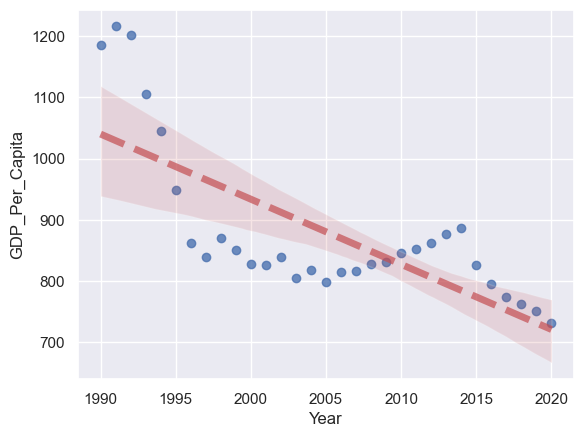

In [30]:
sns.regplot(y = gdp_burundi['GDP_Per_Capita'], x = gdp_burundi['Year'],
            line_kws = {'color':'r', 'alpha':0.7, 'lw':5, 'linestyle':'--'})

In [31]:
gdp_df_1990 = gdp_decades.query('Year == 1990')
gdp_df_1990

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [32]:
gdp_df_1990_2020 = pd.merge(gdp_df_1990, gdp_df_2020, left_on = 'Country', right_on = 'Country', how = 'inner')
gdp_df_1990_2020 = gdp_df_1990_2020.rename(columns = {'GDP_Per_Capita_x': 'GDP_Per_Capita_1990', 
                                                      'GDP_Per_Capita_y': 'GDP_Per_Capita_2020'})
gdp_df_1990_2020 = gdp_df_1990_2020.drop(columns = ['Year_x', 'Year_y']) 
gdp_df_1990_2020['2020>1990'] = gdp_df_1990_2020['GDP_Per_Capita_2020'] > gdp_df_1990_2020['GDP_Per_Capita_1990']
gdp_df_1990_2020

,Country,GDP_Per_Capita_1990,GDP_Per_Capita_2020,2020>1990
0,Africa Eastern and Southern,3083.976800,3491.978104,True
1,Africa Western and Central,2810.341129,4021.293919,True
2,Albania,4827.034551,13253.733337,True
3,Algeria,8746.340762,10735.382539,True
4,Angola,5758.950488,6141.963839,True
...,...,...,...,...
200,Vanuatu,2855.554643,2878.475335,True
201,Vietnam,2066.372215,10338.270543,True
202,World,9704.621768,16269.969854,True
203,Zambia,2190.181724,3277.816510,True


In [33]:
gdp_df_1990_2020['2020>1990'].mean()

0.8926829268292683

In [34]:
gdp_df_1990_2020.loc[gdp_df_1990_2020['2020>1990'] == False]

,Country,GDP_Per_Capita_1990,GDP_Per_Capita_2020,2020>1990
9,Aruba,32589.018572,29563.756955,False
15,Barbados,13985.829980,13316.487393,False
25,Brunei,71232.789430,62200.882043,False
28,Burundi,1184.842032,731.064074,False
33,Central African Republic,1201.674665,937.856470,False
39,Comoros,3061.328732,2984.413403,False
40,Congo,5068.286948,3497.565454,False
44,Dem. Rep. Congo,1819.723315,1082.445242,False
65,Fragile and conflict affected situations,4874.531032,4450.512739,False
67,Gabon,18179.170002,14320.844646,False


13(BONUS). Yes, of the 205 countries that had data for both years89.3% of countries had higher GDP per capita in 2020 compared            to in 1990.
           The countries that had lower GDP per capita in 2020 than 1990 are:
           Aruba, Barbados, Brunei, Burundi, Central African Republic, Comoros, Congo, Dem. Rep. Congo, Gabon, Guinea-Bissau,
           Haiti, Kiribati, Hyrgyz Republic, Madagascar, Oman, Tajikistan, The Bahamas, The Gambia, Ukraine, United Arab                  Emirates, and Zimbabwe.

In [35]:
internet_df = pd.read_csv('../data/internet_use.csv', engine = 'python', on_bad_lines = 'skip', skipfooter = 180)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [36]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [37]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [38]:
internet_df.value_counts(['Year'])

Year
1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2001    201
2005    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1965      7
1980      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
dtype: int64

16. Most countries are missing data before the year 1994.

In [39]:
internet_df_byyear = internet_df.sort_values('Year', ascending = True)
internet_df_byyear

,Country,Year,Internet_Users_Pct
1663,Grenada,1960,0.00
665,Burundi,1960,0.00
3917,Syria,1960,0.00
2558,Maldives,1960,0.00
4018,Thailand,1960,0.00
...,...,...,...
929,Costa Rica,2014,49.41
2642,Mauritius,2014,41.44
953,Cote d'Ivoire,2014,14.60
3366,Saint Kitts and Nevis,2014,65.40


In [40]:
internet_df_byyear.query('Internet_Users_Pct != 0')

,Country,Year,Internet_Users_Pct
4276,United Kingdom,1990,0.087355
4301,United States,1990,0.784729
375,Belgium,1990,0.001007
3720,Spain,1990,0.012874
1107,Denmark,1990,0.097277
...,...,...,...
929,Costa Rica,2014,49.410000
2642,Mauritius,2014,41.440000
953,Cote d'Ivoire,2014,14.600000
3366,Saint Kitts and Nevis,2014,65.400000


17. 1990 is the first year to have a non zero internet users percentage.

In [41]:
internet_df_2000 = internet_df.query('Year == 2000')
internet_df_2014 = internet_df.query('Year == 2014')
internet_df_2000_2014 = pd.concat([internet_df_2000, internet_df_2014])
internet_df_2000_2014

,Country,Year,Internet_Users_Pct
29,Albania,2000,0.114097
50,Algeria,2000,0.491706
72,Andorra,2000,10.538836
92,Angola,2000,0.105046
112,Antigua and Barbuda,2000,6.482226
...,...,...,...
4389,Viet Nam,2014,48.310000
4409,Virgin Islands (U.S.),2014,50.070000
4431,Yemen,2014,22.550000
4451,Zambia,2014,17.340000


In [42]:
modif_internet = internet_df_2000_2014.drop(columns = ['Country'])

In [43]:
modif_internet.query('Year == 2014').quantile([0.25, 0.5, 0.75])

,Year,Internet_Users_Pct
0.25,2014.0,17.5175
0.50,2014.0,44.6550
0.75,2014.0,69.9450


In [44]:
modif_internet.query('Year == 2000').quantile([0.25, 0.5, 0.75])

,Year,Internet_Users_Pct
0.25,2000.0,0.401189
0.50,2000.0,2.506411
0.75,2000.0,9.733934


sns.boxplot(x = internet_df_2000_2014['Year'], y = internet_df_2000_2014['Internet_Users_Pct'])

18. The distribution of percent of internet users differs greatly between 2000 and 2014. The year 2000 has a mean of 3% with lower and upper quartiles at 0-10%. The year 2014 has a median of 45% with lower and upper quartiles at 18-70%. 

In [45]:
internet_df_2014.query('Internet_Users_Pct < 5').head()

,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00


In [46]:
internet_df_2014.query('Internet_Users_Pct < 5').count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

19. There are 16 countries that had internet users below 5% in 2014. 

In [47]:
gdp_df = gdp_df_rename
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [48]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, 
                                left_on = ['Country', 'Year'], right_on = ['Country', 'Year'], 
                                how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


In [49]:
gdp_and_internet_use_2014 = gdp_and_internet_use.query('Year == 2014')
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


In [50]:
gdp_and_internet_use_2014.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.741612,98.16
645,Bermuda,2014,77361.104881,96.80
4880,Norway,2014,62390.130313,96.30
1561,Denmark,2014,52048.335493,95.99
7179,Andorra,2014,NaN,95.90
...,...,...,...,...
6721,Tuvalu,2014,3497.520822,NaN
6907,Upper middle income,2014,14564.823543,NaN
7031,Vietnam,2014,7601.858491,NaN
7062,West Bank and Gaza,2014,5967.073437,NaN


In [51]:
top3_countries_int_2014 = ['Iceland', 'Bermuda', 'Norway']
top3_gdp_internet = gdp_and_internet_use.query('Country in @top3_countries_int_2014')
top3_gdp_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994,NaN,6.794812
7671,Iceland,1993,NaN,2.667825
7672,Iceland,1992,NaN,1.539160
7673,Iceland,1991,NaN,0.505129


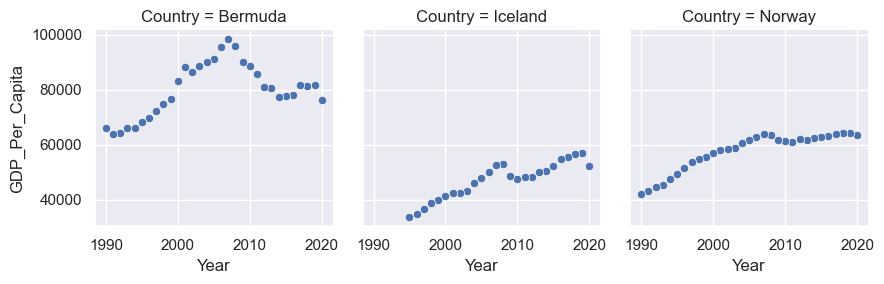

In [52]:
g = sns.FacetGrid(top3_gdp_internet, col = 'Country')
g.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')

21. All 3 countries had a net increase in GDP from 1990-2020 and have a spike in GDP around 2008. After this spike in 2008 there is a gradual decrease in GDP for all countries. 

In [53]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


<AxesSubplot:xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

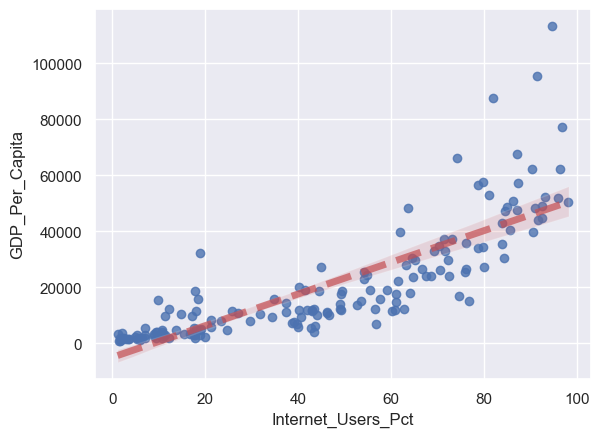

In [54]:
sns.regplot(y = gdp_and_internet_use_2014['GDP_Per_Capita'], x = gdp_and_internet_use_2014['Internet_Users_Pct'],
            line_kws = {'color':'r', 'alpha':0.7, 'lw':5, 'linestyle':'--'})